### Decision Tree classifier

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [2]:
iris = load_iris()

In [3]:
x=pd.DataFrame(iris['data'],columns=iris['feature_names'])
y=iris['target']

In [4]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [9]:
tree_classifier = DecisionTreeClassifier()

In [10]:
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = tree_classifier.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


### visualision of data

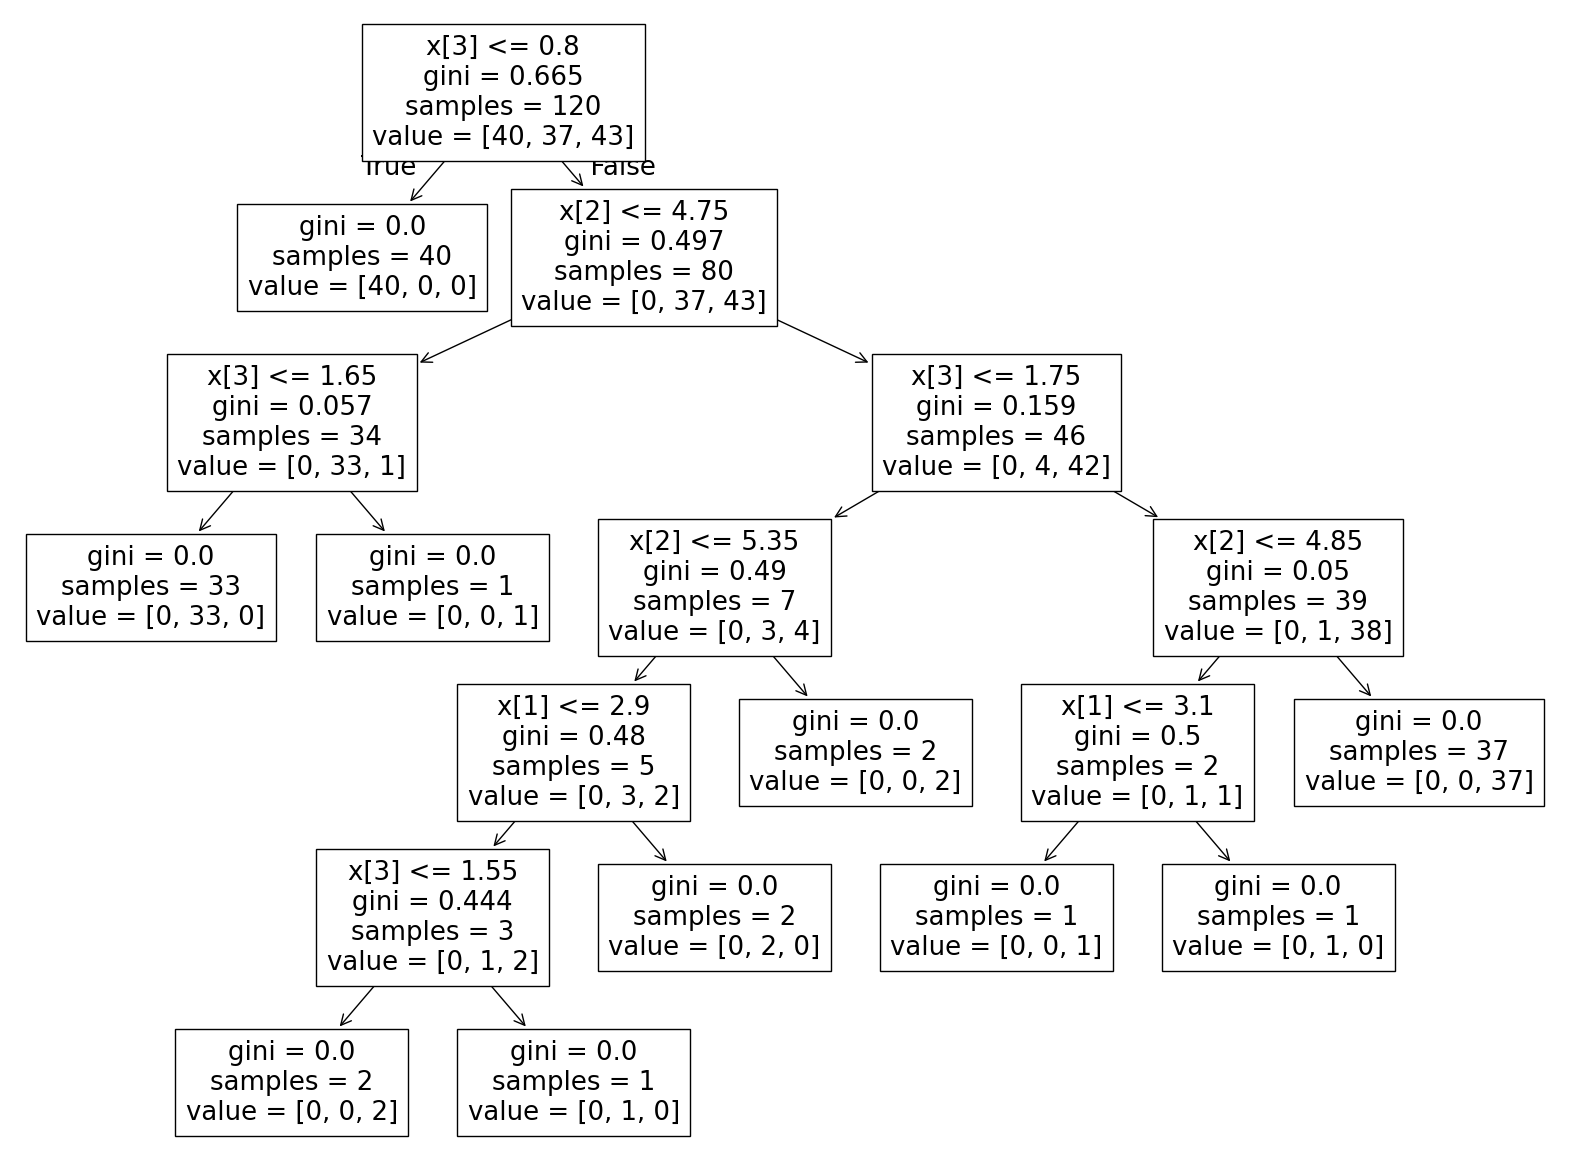

In [20]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(tree_classifier)
plt.show()

### Hyperperameter tunning and pre pruning

In [21]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth': range(1,20),
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [24]:
decision_model = DecisionTreeClassifier()
decision_grid = GridSearchCV(decision_model, params, cv=5, scoring='accuracy') 

In [25]:
decision_grid.fit(x_train, y_train)

e:\codes\course\mlenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
570 fits failed out of a total of 1710.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
570 fits failed with the following error:
Traceback (most recent call last):
  File "e:\codes\course\mlenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\codes\course\mlenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\codes\course\mlenv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\codes\course\mlenv\Lib\site-packages\sklearn\uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 20),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [26]:
decision_grid.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [27]:
y_pred = decision_grid.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
